In [1]:
import pandas as pd

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
data=pd.read_csv("C:/Users/BEST BUY COMPUTERS/Downloads/archive (1)/crop.csv")

In [5]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [7]:
data.shape

(18185, 12)

In [8]:
data.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [14]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [15]:
data.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class               object
dtype: object

In [29]:
data.tail()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,Gonen


In [16]:
data["Class"].nunique

<bound method IndexOpsMixin.nunique of 0        jasmine
1        jasmine
2        jasmine
3        jasmine
4        jasmine
          ...   
18180      Gonen
18181      Gonen
18182      Gonen
18183      Gonen
18184      Gonen
Name: Class, Length: 18185, dtype: object>

In [17]:
data["Class"].nunique()

2

In [20]:
data["Class"].unique

<bound method Series.unique of 0        jasmine
1        jasmine
2        jasmine
3        jasmine
4        jasmine
          ...   
18180      Gonen
18181      Gonen
18182      Gonen
18183      Gonen
18184      Gonen
Name: Class, Length: 18185, dtype: object>

In [26]:
data.Class.value_counts()

Class
jasmine    9985
Gonen      8200
Name: count, dtype: int64

In [28]:
data.Class.value_counts(True)

Class
jasmine    0.549079
Gonen      0.450921
Name: proportion, dtype: float64

In [33]:
data.Class.isnull().sum()   #avain

np.int64(0)

In [34]:
df=data.drop('id',axis=1)

In [35]:
df.shape

(18185, 11)

In [36]:
data.shape

(18185, 12)

In [50]:
corr=df.corr()

ValueError: could not convert string to float: 'jasmine'

In [46]:
df_num=df.select_dtypes("number")

In [47]:
df_num.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [48]:
df_cat=df.select_dtypes("object")

In [49]:
df_cat.head()

,Class
0,jasmine
1,jasmine
2,jasmine
3,jasmine
4,jasmine


In [60]:
corr=df_num.corr().round(2)

In [61]:
corr

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
Area,1.00,0.60,0.93,-0.55,1.00,1.00,0.23,0.88,0.62,-0.62
MajorAxisLength,0.60,1.00,0.27,0.30,0.60,0.62,-0.07,0.87,-0.20,0.24
MinorAxisLength,0.93,0.27,1.00,-0.81,0.93,0.92,0.31,0.67,0.83,-0.86
Eccentricity,-0.55,0.30,-0.81,1.00,-0.55,-0.53,-0.33,-0.17,-0.90,0.95
ConvexArea,1.00,0.60,0.93,-0.55,1.00,1.00,0.23,0.89,0.61,-0.62
EquivDiameter,1.00,0.62,0.92,-0.53,1.00,1.00,0.23,0.89,0.61,-0.61
Extent,0.23,-0.07,0.31,-0.33,0.23,0.23,1.00,0.07,0.37,-0.35
Perimeter,0.88,0.87,0.67,-0.17,0.89,0.89,0.07,1.00,0.19,-0.23
Roundness,0.62,-0.20,0.83,-0.90,0.61,0.61,0.37,0.19,1.00,-0.95
AspectRation,-0.62,0.24,-0.86,0.95,-0.62,-0.61,-0.35,-0.23,-0.95,1.00


<Axes: >

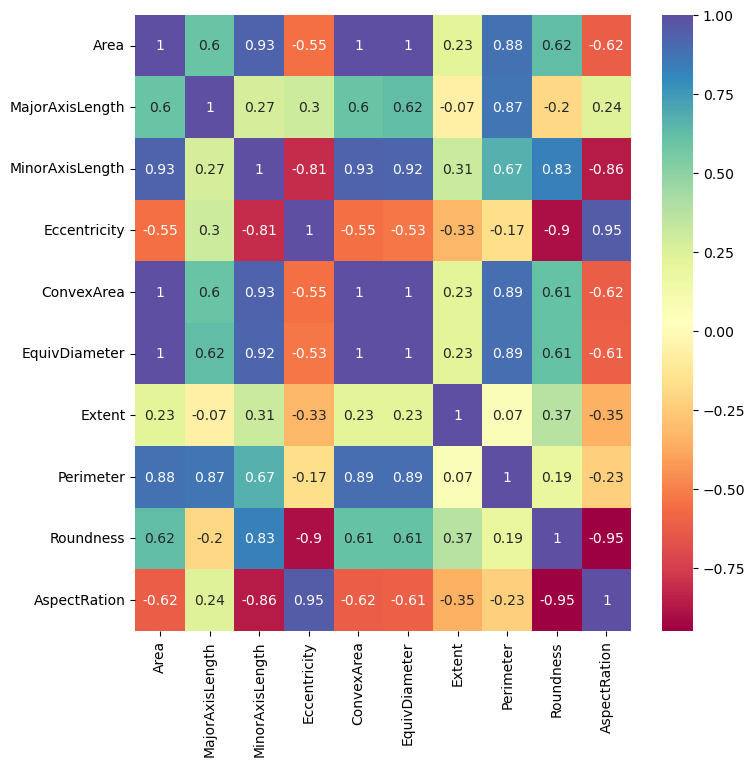

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr,annot=True,cmap='Spectral')

In [57]:
plt.show()     # command function??

In [59]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
AS NO NULL VALUES SO FILLNA SKIPPED

In [ ]:
NOW VISUALIZING DATA


<Axes: xlabel='Extent', ylabel='count'>

C:\anaconda\envs\myenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\anaconda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


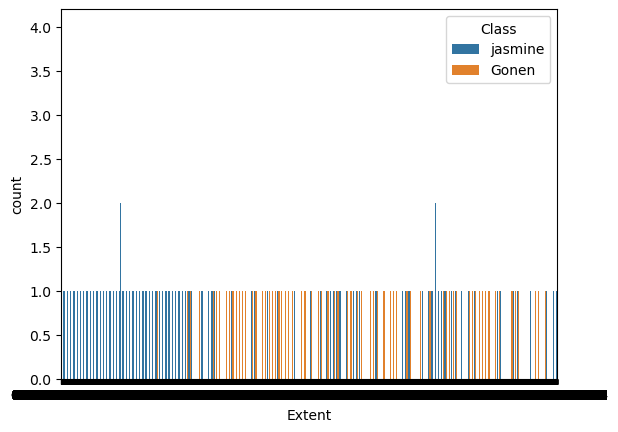

In [66]:
sns.countplot(data,x='Extent',hue='Class')

In [71]:
data.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [70]:
data.tail()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,Gonen


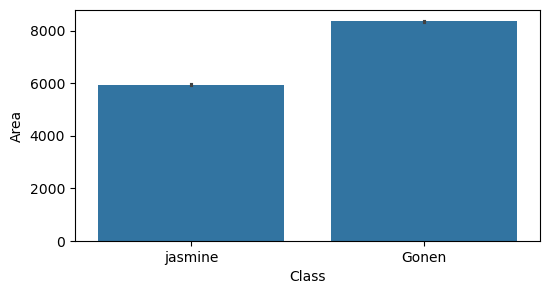

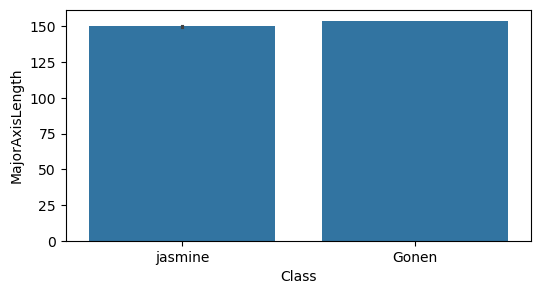

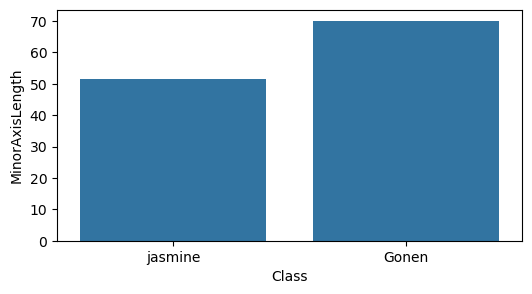

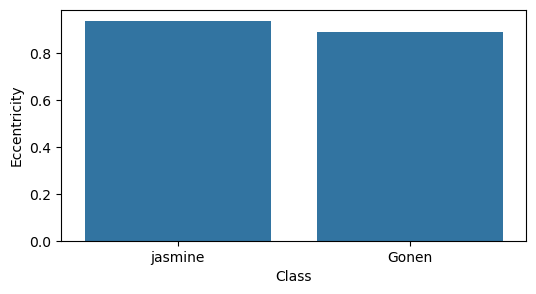

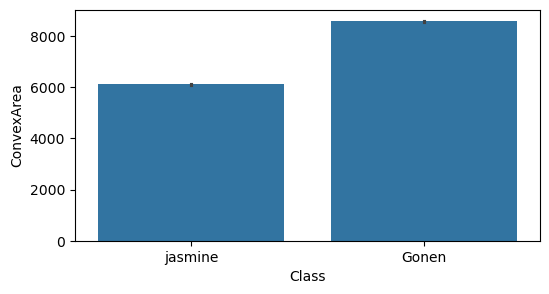

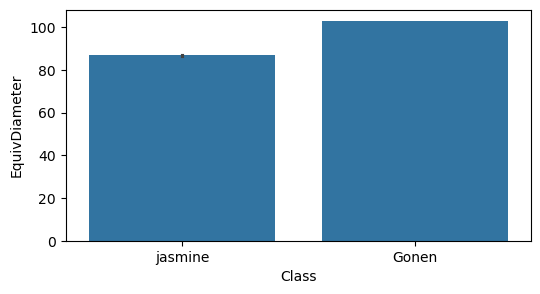

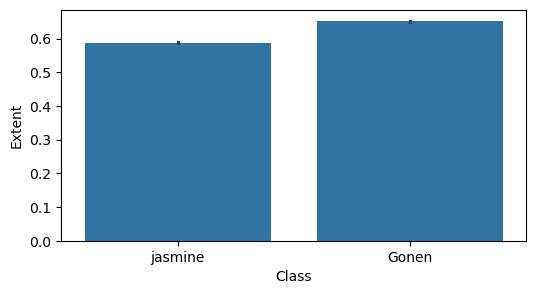

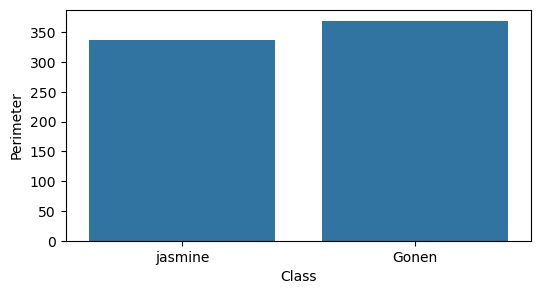

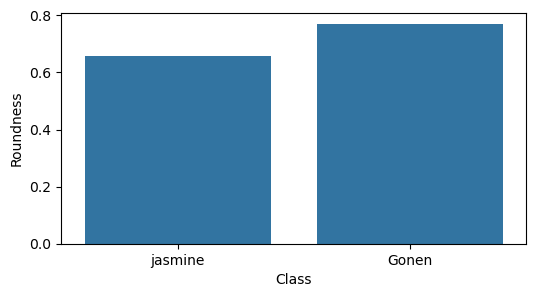

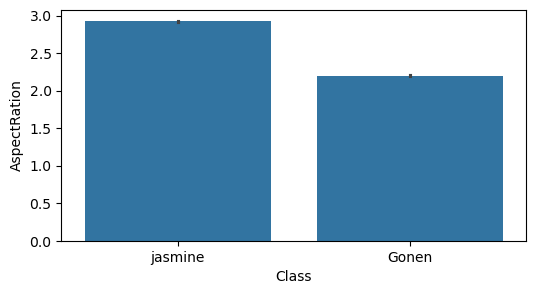

In [74]:
for col in df_num[:]:
    plt.figure(figsize=(6,3),)
    sns.barplot(data,x='Class',y=col)

In [ ]:
CONVERTIN CAT TO NUM

In [81]:
df_cat_encodd=pd.get_dummies(df_cat,columns=df_cat.columns.tolist())

In [82]:
df_cat_encodd

,Class_Gonen,Class_jasmine
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
18180,True,False
18181,True,False
18182,True,False
18183,True,False


In [85]:
df_cat_encod = df_cat_encodd.astype(int)

In [86]:
df_cat_encod

,Class_Gonen,Class_jasmine
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
18180,1,0
18181,1,0
18182,1,0
18183,1,0


In [ ]:
CONCATINATION

In [90]:
finalData=pd.concat([df_cat_encod,df_num],axis=1,join="outer")

In [91]:
finalData.head()

,Class_Gonen,Class_jasmine,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,0,1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,0,1,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,0,1,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,0,1,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [92]:
finalData.shape

(18185, 12)

In [93]:
y=finalData['Class_Gonen','Class_jasmine']

KeyError: ('Class_Gonen', 'Class_jasmine')

In [94]:
y = finalData[['Class_Gonen', 'Class_jasmine']]

In [95]:
y.head()

,Class_Gonen,Class_jasmine
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [97]:
x=finalData.drop(('Class_Gonen', 'Class_jasmine'),axis=1)

KeyError: "[('Class_Gonen', 'Class_jasmine')] not found in axis"

In [99]:
x=finalData.drop(['Class_Gonen', 'Class_jasmine'], axis=1)

In [100]:
x.sample()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
13285,7159,141.912831,65.180242,0.888282,7453,95.473148,0.76322,340.491,0.775981,2.177237


In [ ]:
Scaling

In [103]:
sc=StandardScaler()
s=sc.fit_transform(x)

In [105]:
s

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [ ]:
Spliting data 30 70

In [107]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [108]:
X_train.shape,X_test.shape

((12729, 10), (5456, 10))

In [ ]:
Building Clasifier

In [109]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc=RandomForestClassifier(max_depth=5)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [112]:
y_pred=rfc.predict(X_test)

In [115]:
accuracy={}
print(accuracy_score(y_test,y_pred))

0.9893695014662757


In [116]:
from sklearn.metrics import confusion_matrix

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2501
           1       0.99      0.99      0.99      2955

   micro avg       0.99      0.99      0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456
 samples avg       0.99      0.99      0.99      5456

